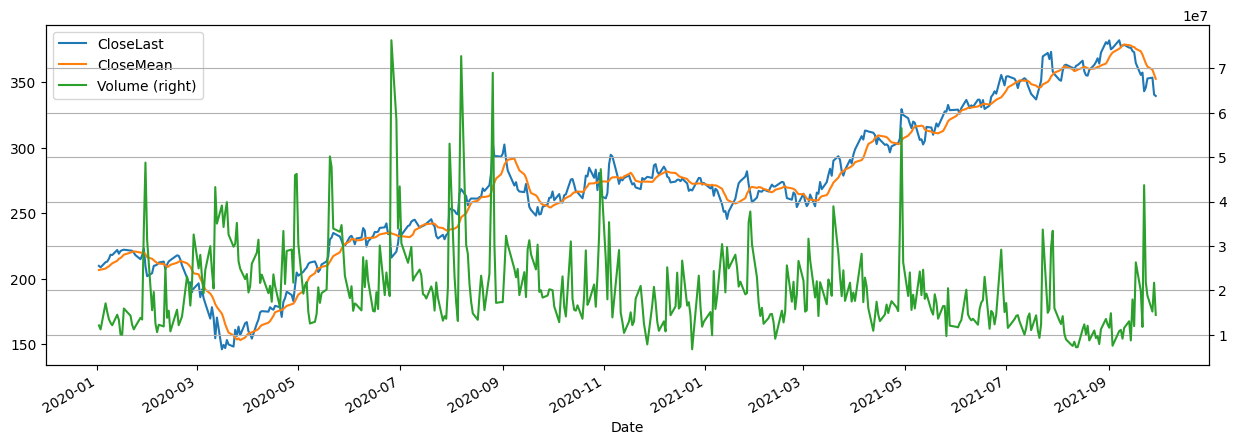

In [1]:
import pandas as pd

def remove_dollar_sign(data: str) -> float:
    return float(data.replace('$',''))

df = pd.read_csv(
    'fb.csv',
    parse_dates=['Date'],
    index_col=['Date'],
).iloc[::-1].rename(columns={
    'Close/Last': 'CloseLast'
}).assign(
    CloseLast=lambda x: x['CloseLast'].map(remove_dollar_sign),
    Open=lambda x: x['Open'].map(remove_dollar_sign),
    High=lambda x: x['High'].map(remove_dollar_sign),
    Low=lambda x: x['Low'].map(remove_dollar_sign),
    CloseMean=lambda x: x['CloseLast'].rolling('14D').mean()
)

df['2020':'2021'].plot(
    y=['CloseLast', 'CloseMean', 'Volume'],
    secondary_y=['Volume'],
    figsize=(15, 5),
    grid=True,
);

